## Tutorial Sheet Music Advanced Part1: Search for a motif in Josquin's mass “La sol fa re mi” 

(version 2022_01_03)

Table of contents:
1.	[Search for a sequence of tones](#A)
2.	[Search for all transpositions of a sequence](#B)
3.	[Tasks](#C)


This tutorial explains how to use Music21 to search for a melodic motif in a piece and how to display the exact positions of the instances (voice, measure, beat).

As always, you first start the program and load the piece to be analyzed under a freely chosen variable name ('music'). We choose the Kyrie from the mass "Missa La sol fa re mi" by Josquin (Jos1102) to search for the sequence of notes "La sol fa re mi" (= A G F D E):

In [1]:
from music21 import * 
# with this command ('Run'-Button!) the music21 library will be loaded.
# This command must ALWAYS be started when working with a notebook. 


In [2]:
music = converter.parse('https://analyse.hfm-weimar.de/database/02/PrJode_Jos1102_COM_1-5_MissaLasol_002_00137.xml')
# The Kyrie sentence is now internally labeled as variable 'music. 


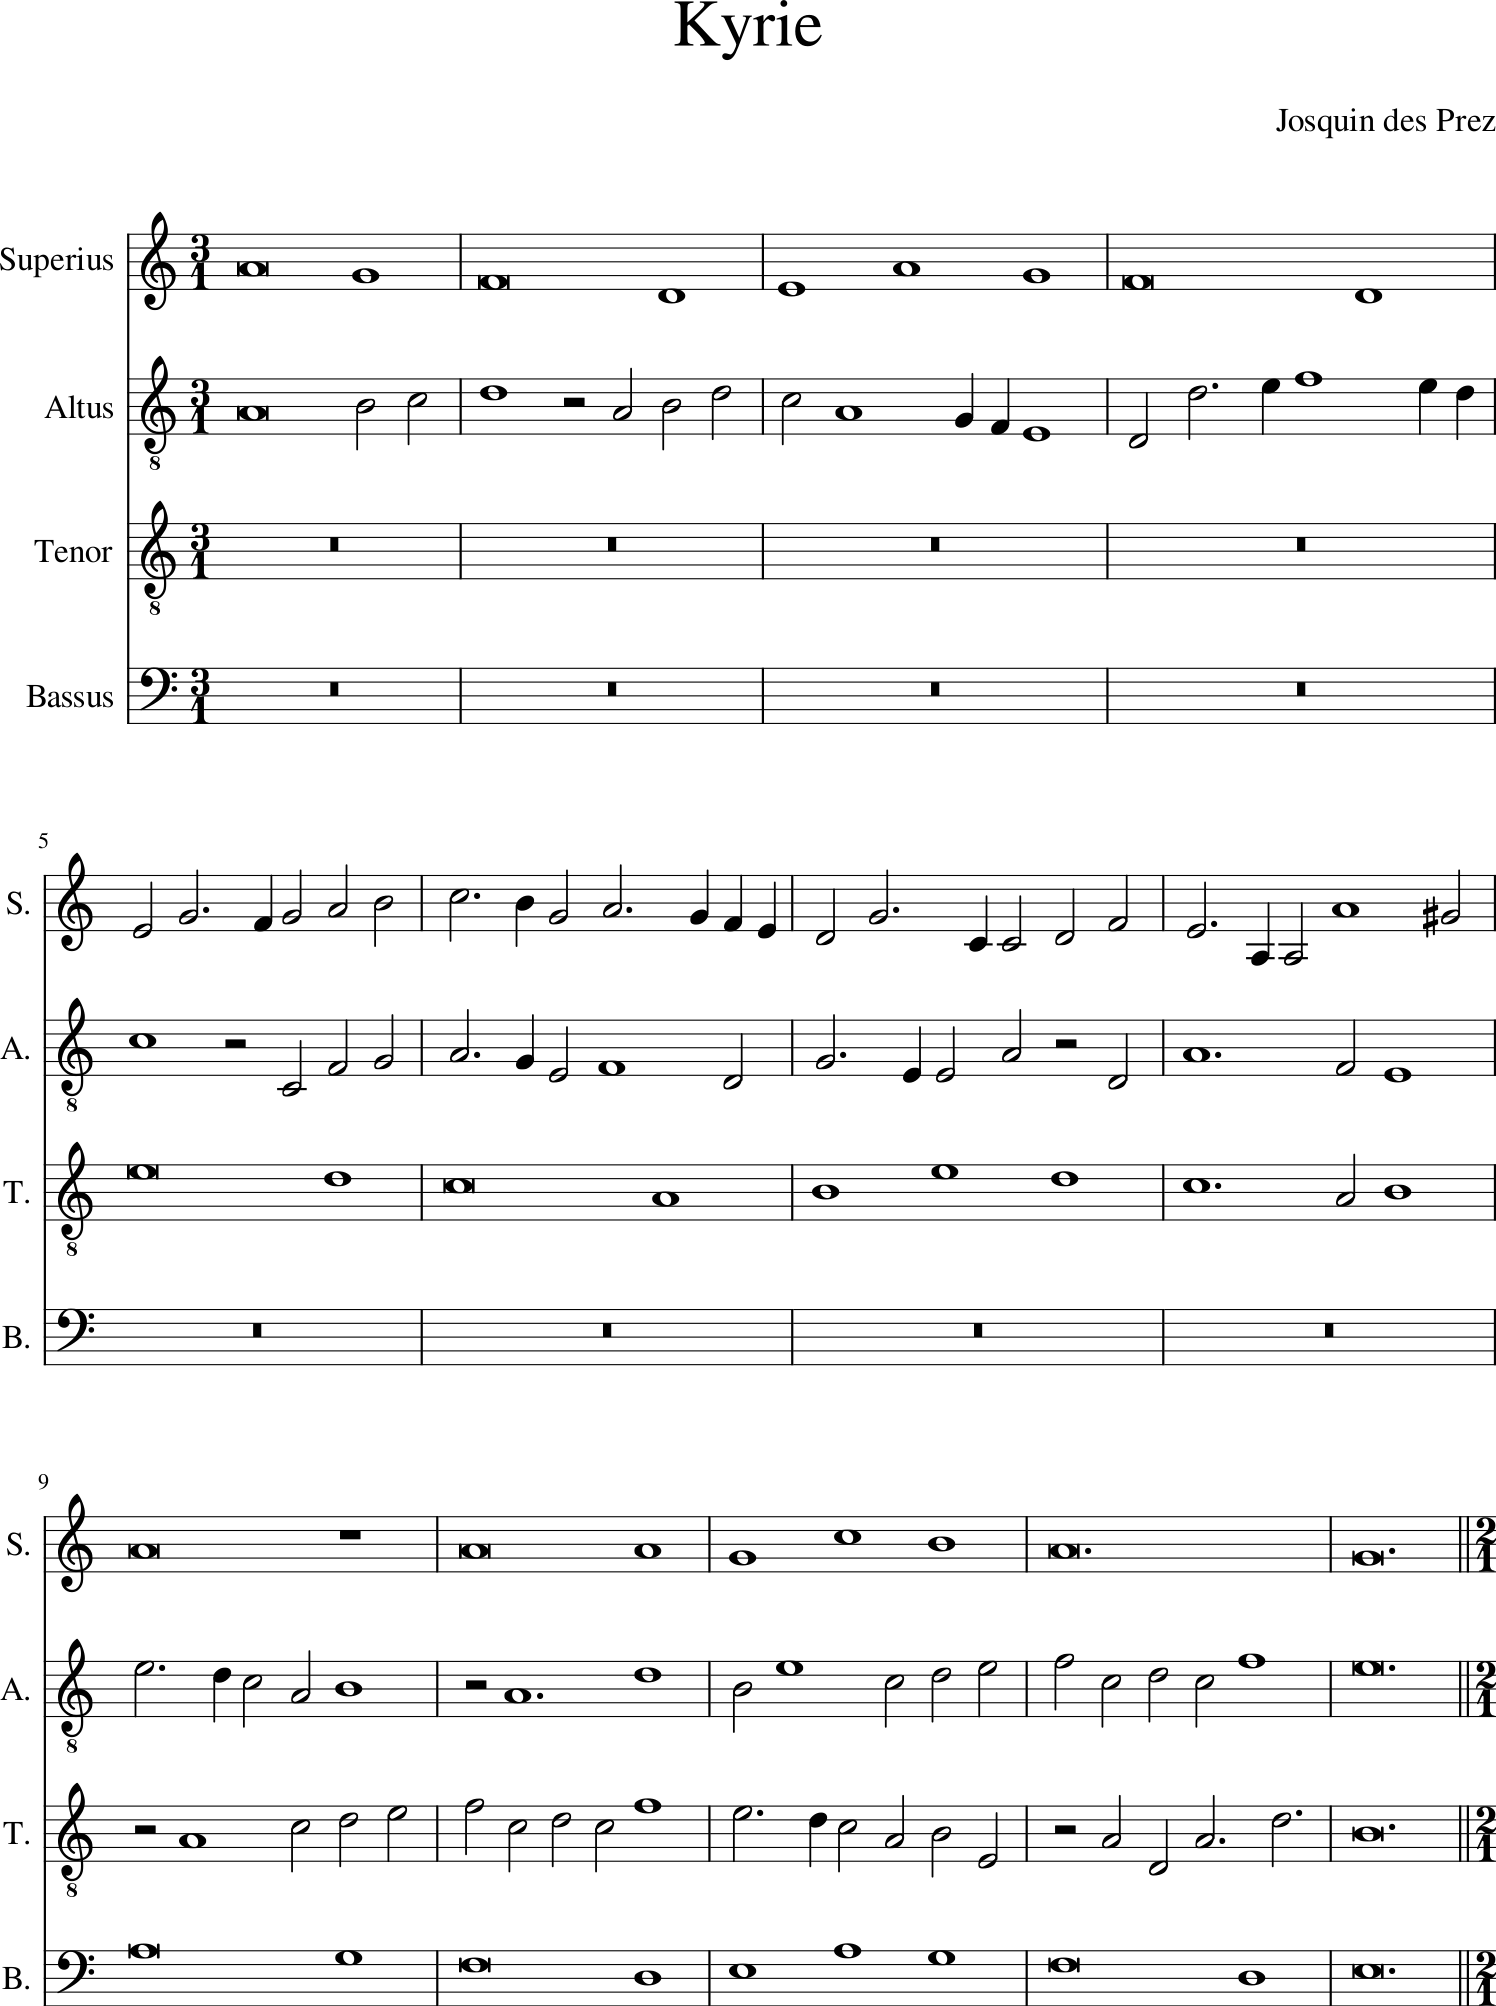

In [3]:
music.show()
# This command show the beginning of the sheet music.

In [4]:
music.show('midi')
# or opened as audio (midi) in the browser (Firefox and Chrome only!).

### 1. Search for a sequence of tones <a id='A'></a>

Now we have to enter the motif we want to search for. To do this, we need to create a so-called stream (i.e. a sequence of notes), which we call "StreamMot". We are looking for the "La Sol Fa Re Mi"  (= A G F D E) motif. For this we enter it through the internal notation of music21:

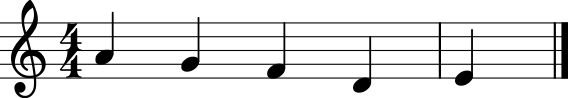

In [5]:
StreamMot = stream.Stream()
StreamMot.append(note.Note('A'))
StreamMot.append(note.Note('G'))
StreamMot.append(note.Note('F'))
StreamMot.append(note.Note('D'))
StreamMot.append(note.Note('E'))
StreamMot.show()
# a 4/4 time signature and quarter notes are used as default setting.

Since we only want to search for a pitch sequence independent of the rhythm, the rhythm entered in our search motif must be ignored. The 'recurse' command filters out all features except the pitches from the file; the result of this filtering is a sequence of notes as the variable 'full_piece_stream'.

In [6]:
full_piece_stream = music.recurse().notes

Now the search for the melodic line of the motif is created by the "search.noteNameSearch" function

In [7]:
p_full_piece = search.noteNameSearch(full_piece_stream, StreamMot)
p_full_piece

[0, 5, 41, 84, 89, 94, 356, 417, 422, 427, 447, 452, 469, 475, 492, 497, 502]

The positions of the output tones are listed (as 'p_full_piece'). This list can be further processed in several ways:

1. Number of motifs in the entire score.

In [8]:
len(p_full_piece)

17

2. You can also display the frequency of the motif in the different voices: 

In [9]:
for Part in music.getElementsByClass('Part'):
    curr_part_r = Part.recurse().notes
    p_curr_part = search.noteNameSearch(curr_part_r, StreamMot)
    print('%9s: %2d' %(Part.partName, len(p_curr_part)))

 Superius:  6
    Altus:  0
    Tenor:  4
   Bassus:  7


3. The exact position in the score of a single element of the list 'p' is displayed if you put the position of the element in square brackets. For example, one asks for the position of the fourth element (music21 always starts counting at 0, so one must enter a '3' for the fourth element):

In [10]:
p_full_piece[3]

84

This means that the fourth element of the list 'p_full_piece' is the 84th note in the stream 'StreamMot' (the list with the notes of the piece). If you put this again in square brackets you get more info:

In [11]:
full_piece_stream[p_full_piece[3]]

<music21.note.Note A>

It was to be expected that it is the note A (initial note of our search motive). More important is the measure and the exact position of the beginning of the motif as well as the voice:

In [12]:
full_piece_stream[p_full_piece[3]].measureNumber

42

In [13]:
full_piece_stream[p_full_piece[3]].beat

1.0

In [14]:
full_piece_stream[p_full_piece[3]].getContextByClass('Part')

<music21.stream.Part Superius>

We can verify this by looking at the score, measure 42. 

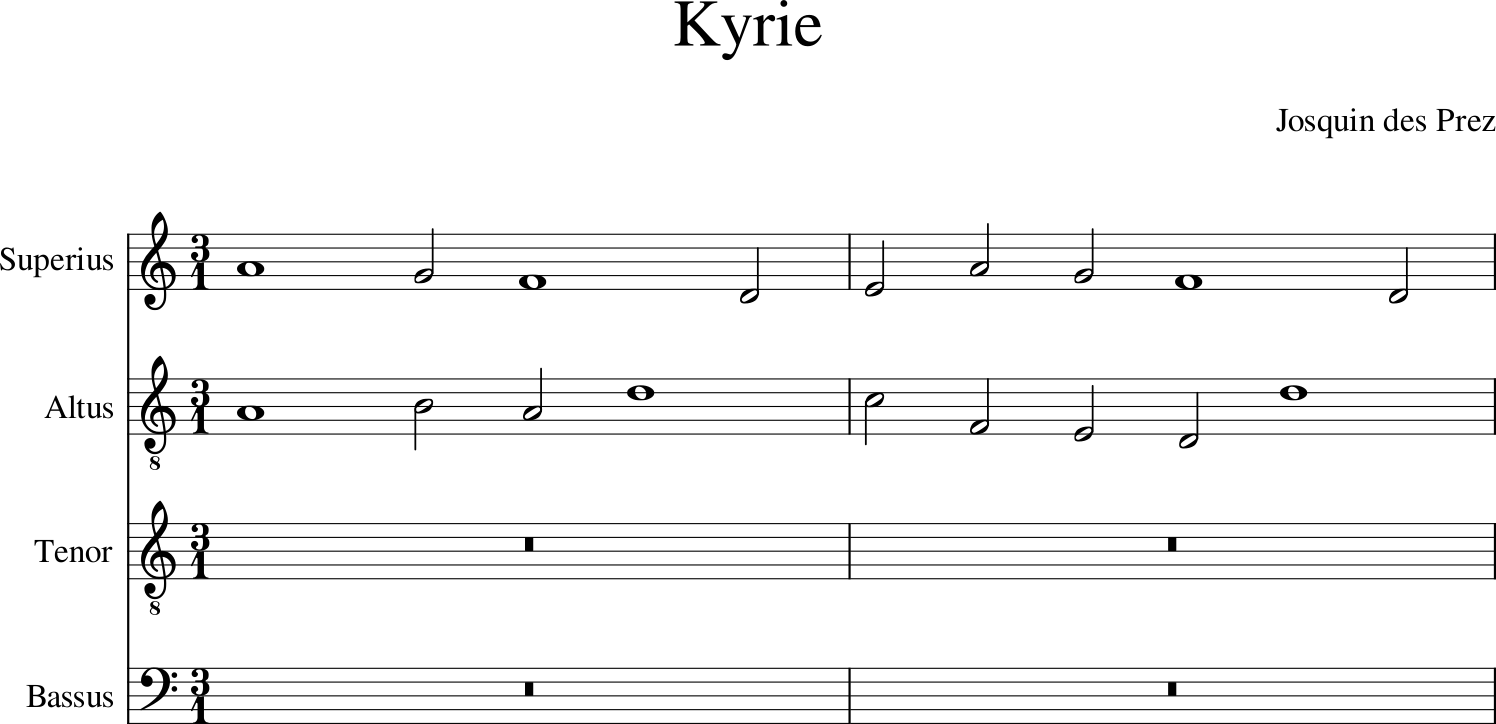

In [15]:
music.measures(42,43).show()

4. If you want to list all the positions at once and for all motif repetitions, you can use the following command (a recursive 'loop' command):

In [16]:
zähler=1
for Position in p_full_piece:
        startingNote=full_piece_stream[Position]
        startingMeasure = startingNote.measureNumber
        startingBeat = startingNote.beat
        startingPart = startingNote.getContextByClass('Part')
        print('%2s %3s %3s' %(zähler, startingNote.nameWithOctave, startingMeasure), startingBeat, startingPart)
        zähler+=1

 1  A4   1 1.0 <music21.stream.Part Superius>
 2  A4   3 2.0 <music21.stream.Part Superius>
 3  A4  14 1.0 <music21.stream.Part Superius>
 4  A4  42 1.0 <music21.stream.Part Superius>
 5  A4  43 1.5 <music21.stream.Part Superius>
 6  A4  44 1.5 <music21.stream.Part Superius>
 7  A3  20 1.0 <music21.stream.Part Tenor>
 8  A3  52 1.5 <music21.stream.Part Tenor>
 9  A3  53 1.5 <music21.stream.Part Tenor>
10  A3  54 1.5 <music21.stream.Part Tenor>
11  A3   9 1.0 <music21.stream.Part Bassus>
12  A3  11 2.0 <music21.stream.Part Bassus>
13  A3  29 1.0 <music21.stream.Part Bassus>
14  A3  32 1.0 <music21.stream.Part Bassus>
15  A3  45 1.0 <music21.stream.Part Bassus>
16  A3  46 1.5 <music21.stream.Part Bassus>
17  A3  47 1.5 <music21.stream.Part Bassus>


5. Finally, you can mark the notes in question in the score, either with a color or a character, e.g.  *  :

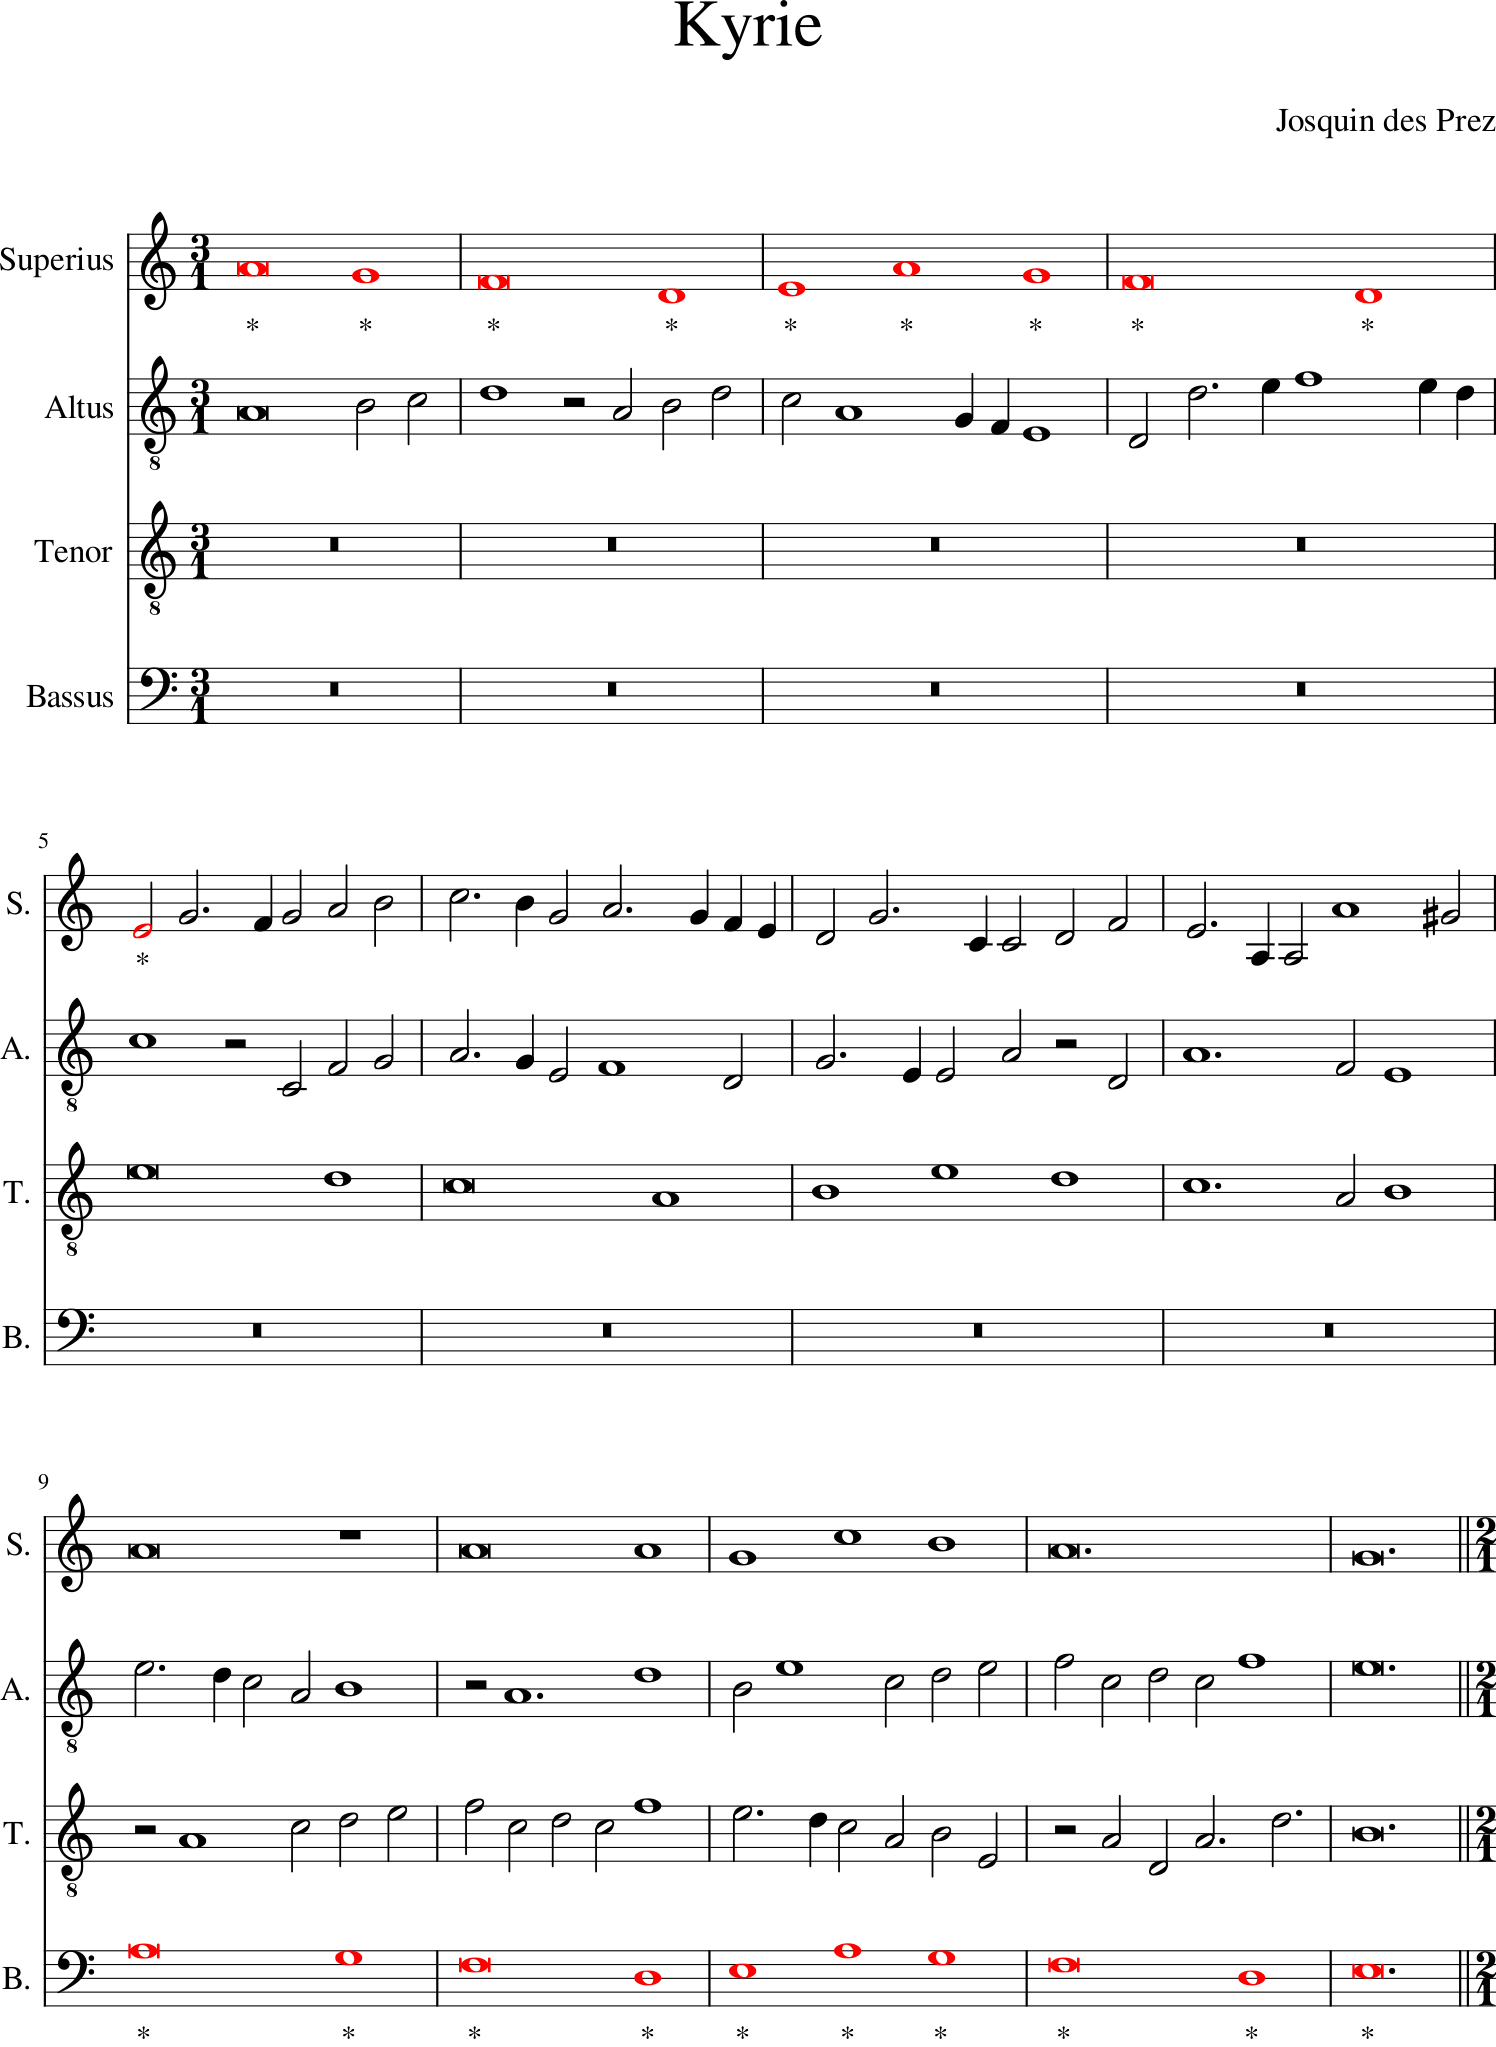

In [17]:
for found in p_full_piece:
    for ffound in range(len(StreamMot)):
        full_piece_stream[found+ffound].lyric = '*'
        full_piece_stream[found+ffound].style.color='red'

# Here the color red ('red') was chosen. 
# Try another color!


music.show()

You can write the marked version of the score to a new file, whose path is depicted in the output cell and which you can in turn open with MuseScore:

In [18]:
music.write()
# Alternatively, you can specify your own path and name, see above, e.g.:
# music.write(fp="D:/Dokumente/josquin_markiert.xml")
# To do this, you must delete the hash before the command and enter a local path on your computer.   


WindowsPath('C:/users/Martin/Fellowship/music21/tmp_pbqy456.xml')

### 2. Search for all transpositions of a sequence <a id='B'></a>

In Music21, a command can be programmed to search for chromatic transpositions of a motif in one fell swoop. First we need the following command: 

In [19]:
def pitchClassEqual(n1, n2):
    if not hasattr(n1, 'pitch'):
        return False
    if not hasattr(n2, 'pitch'):
        return False
    if n1.pitch.pitchClass == n2.pitch.pitchClass:
        return True
    else:
        return False

In the following, we will search for the motif in the 12 keys (and their respective enharmonic equivalents). To do this, one must create an algorithm that is repeated 12 times. A second loop helps to enter the information from each repetition into the results list.

In [20]:
results = []
zähler = 1

# The results must be entered in an extra list ("results"). 
# The "counter" simplifies the enumeration of the tones when you want to show them one after the other.

for egal in range(12):#Suche 12 Mal
    s_len = [StreamMot.notes[i].name for i in range (len(StreamMot.notes))]
    print("------------\nSearching for:", *s_len, sep='   ')
    p = search.streamSearchBase(full_piece_stream, StreamMot, algorithm=pitchClassEqual)
    for notePosition in p:
        startingNote=full_piece_stream[notePosition]
        startingMeasure = startingNote.measureNumber
        startingBeat = startingNote.beat
        startingPart = startingNote.getContextByClass('Part')
        results.append(notePosition)
        print('%2s %3s %3s' %(zähler, startingNote.nameWithOctave, startingMeasure), startingBeat, startingPart.id)
        zähler+=1
    [n.transpose(1, inPlace=True) for n in StreamMot]


# After each search, everything is transposed up half a tone


------------
Searching for:   A   G   F   D   E
 1  A4   1 1.0 Superius
 2  A4   3 2.0 Superius
 3  A4  14 1.0 Superius
 4  A4  42 1.0 Superius
 5  A4  43 1.5 Superius
 6  A4  44 1.5 Superius
 7  A3  20 1.0 Tenor
 8  A3  52 1.5 Tenor
 9  A3  53 1.5 Tenor
10  A3  54 1.5 Tenor
11  A3   9 1.0 Bassus
12  A3  11 2.0 Bassus
13  A3  29 1.0 Bassus
14  A3  32 1.0 Bassus
15  A3  45 1.0 Bassus
16  A3  46 1.5 Bassus
17  A3  47 1.5 Bassus
------------
Searching for:   B-   G#   F#   E-   F
------------
Searching for:   B   A   G   E   F#
------------
Searching for:   C   B-   G#   F   G
------------
Searching for:   C#   B   A   F#   G#
------------
Searching for:   D   C   B-   G   A
18  D3  36 1.0 Bassus
19  D3  39 1.0 Bassus
------------
Searching for:   E-   C#   B   G#   B-
------------
Searching for:   E   D   C   A   B
20  E4   9 1.0 Altus
21  E4  15 1.0 Altus
22  E4  26 1.0 Altus
23  E4   5 1.0 Tenor
24  E4   7 2.0 Tenor
25  E4  11 1.0 Tenor
26  E4  48 1.0 Tenor
27  E4  49 1.5 Tenor
28  E4 

In [21]:
print(len(results))

34


### 3. Tasks <a id='C'></a>

Now load the other movements of the Missa one after the other and look for the motif! You can use this notebook for this purpose:

1.	save it under a new name.
2.	then load another movement (cf. https://analyse.hfm-weimar.de/doku.php?id=en:prjode).
3.	tap on 'Run' and then start the other code cells - or select 'Cell' -> 'Run All' in the menu.

How often does the motif appear in the other sentences? In which voices?
